In [604]:
import pandas as pd
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import os
import re

%matplotlib inline

## Gather

In [605]:
df = pd.read_csv('twitter-archive-enhanced.csv')
df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None


In [606]:
im_pred_filename = 'image-predictions.tsv'
if not os.path.exists(im_pred_filename):
    url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

    response = requests.get(url)
    
    with open(os.path.join(im_pred_filename), mode='wb') as file:
        
        file.write(response.content)
        
df_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
df_predictions.head(4)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True


In [607]:
tweet_json_filename = 'tweet-json.txt'
tweets_list = []

with open(tweet_json_filename) as json_file:
    for line in json_file:
        temp_dict = {}
        status = json.loads(line)
        temp_dict["tweet_id"] = status['id_str']
        temp_dict["retweet_count"] = status['retweet_count']
        temp_dict["favorite_count"] = status['favorite_count']
        tweets_list.append(temp_dict)

df_tweets = pd.DataFrame(tweets_list)
df_tweets.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [608]:
# Check for retweet status
df[df.retweeted_status_id.notnull()].count()

tweet_id                      181
in_reply_to_status_id           0
in_reply_to_user_id             0
timestamp                     181
source                        181
text                          181
retweeted_status_id           181
retweeted_status_user_id      181
retweeted_status_timestamp    181
expanded_urls                 180
rating_numerator              181
rating_denominator            181
name                          181
doggo                         181
floofer                       181
pupper                        181
puppo                         181
dtype: int64

## Assess

In [609]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [610]:
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [611]:
df_tweets

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [612]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [613]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [614]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


In [615]:
all_columns = pd.Series(list(df) + list(df_predictions) + list(df_tweets))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [616]:
df_clean[df_clean['rating_numerator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [617]:
df_clean[df_clean['rating_denominator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality

- Rating denom is 0 for row 313. Should be 13/10.
- Dog name 'such', 'a', 'quite','not', 'mad' found. The 'This is ...' str extractor didn't work properly
- Name column value is not accurate when the name value comes after lower case `this is [name]` in text
- RIP name not included
- Names followed by `name is ...` are not included
- Some tweets are RT's, as evidenced by first part of tweet
- When two dogs, Bentley/Millie, only first shows up
- Dropping unneeded columns
- Drop rows where df_tweets or df_predictions have no data for a tweet_id
- tweet_id is integer, should be string, in_reply_to... and retweeted_... are in float, should be string
- timestamp should be datetime, instead of object, timestamp column contains +0000 which looks redundant.
- In some of the columns there is None instead of NaN
- Some image predictions do not indicate dogs
- Get rid of extra content in source column
- Some `favorite_count` values are `0`, which seems unlikely.
- Drop any remaining rows that are retweets.
- Some `retweeted_status_id` values are actually garbled strings from the `text column`.
- Missing numerators
- Denominator in names
- Rows where `retweeted_status_timestamp` has values should all be removed as they are retweets

### Tidyness

- Columns have puppo, floofer, etc, and then None, and then the variable name
- Organize main dataframe, combine all into one

## Clean

In [618]:
df_clean = df.copy()
df_predictions_clean = df_predictions.copy()
df_tweets_clean = df_tweets.copy()

## Quality

#### Define

Convert column data to proper types. (Perform this step first so that Tidiness actions can be taken.)

#### Code

In [619]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(str)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(str)
df_clean['retweeted_status_id'] = df_clean['retweeted_status_id'].astype(str)
df_clean['retweeted_status_user_id'] = df_clean['retweeted_status_user_id'].astype(str)
df_predictions_clean['tweet_id'] = df_predictions_clean['tweet_id'].astype(str)

#### Test

In [620]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  doggo                       2356 non-null   obje

In [621]:
df_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Tidiness

#### Define

Combine all dataframes into main dataframe.

Start by merging df_tweets_clean into df_clean, and then merge df_predictions_clean into df_clean.

#### Code

In [622]:
df_master = pd.merge(df_clean, df_tweets_clean, on=['tweet_id'], how='left')

In [623]:
df_master = pd.merge(df_master, df_predictions_clean, on=['tweet_id'], how='left')

#### Test

In [624]:
df_master.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,nan,nan,NaN,https://twitter.com/dog_rates/status/892420643...,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,nan,nan,NaN,https://twitter.com/dog_rates/status/892177421...,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,nan,nan,NaN,https://twitter.com/dog_rates/status/891815181...,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,nan,nan,NaN,https://twitter.com/dog_rates/status/891689557...,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [625]:
# Inspect current state of df_master in external spreadsheets program
df_master.to_csv('twitter_archive_master.csv')

#### Define

Column names are puppo, floofer, etc, and the variable name repeats the name as a string, should be bool.

Convert each column to a new column with a bool value, drop old columns, and rename new columns to simplified names.

#### Code

In [626]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

#### Code

In [627]:
names_temp = ['doggo_temp', 'floofer_temp', 'pupper_temp', 'puppo_temp']
names = ['doggo', 'floofer', 'pupper', 'puppo']
for i in range(4):
    df_master[names_temp[i]] = np.where(df_master[names[i]] != "None", True, False)

In [628]:
# Quick Test

df_master[['doggo', 'floofer', 'pupper', 'puppo', 'doggo_temp', 'floofer_temp', 'pupper_temp', 'puppo_temp']].sample(20)

,doggo,floofer,pupper,puppo,doggo_temp,floofer_temp,pupper_temp,puppo_temp
1948,None,None,pupper,None,False,False,True,False
2034,None,None,None,None,False,False,False,False
833,None,None,None,None,False,False,False,False
1756,None,None,None,None,False,False,False,False
2191,None,None,None,None,False,False,False,False
87,None,None,None,None,False,False,False,False
1421,None,None,None,None,False,False,False,False
1976,None,None,None,None,False,False,False,False
747,None,None,None,None,False,False,False,False
1392,None,None,None,None,False,False,False,False


In [629]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [630]:
df_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [631]:
for i in range(4):
    df_master.rename(columns={names_temp[i]: names[i]}, inplace=True)

#### Test

The `df_master.sample(20)` command previously showed that the bool values are correct for the previous columnd data.

The below command shows that the new bool columns are in place.

In [632]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         2356 non-null   object 
 7   retweeted_status_user_id    2356 non-null   object 
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  retweet_count               2354 

## Quality

#### Define

Rating denominator is 0 for row 313. Should be 13/10. Fix manually.

#### Code

In [633]:
df_master[df_master['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo,floofer,pupper,puppo
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,nan,nan,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,False


In [634]:
df_master.loc[313, 'rating_denominator'] = 10

In [635]:
df_master.loc[313, 'rating_numerator'] = 13

#### Test

In [636]:
df_master.loc[313, ['rating_numerator', 'rating_denominator']]

rating_numerator      13
rating_denominator    10
Name: 313, dtype: object

#### Define

Drop unneeded column, `source`.

#### Code

In [637]:
df_master.drop(['source'], axis=1, inplace=True)

#### Test

In [638]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       2356 non-null   object 
 2   in_reply_to_user_id         2356 non-null   object 
 3   timestamp                   2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         2356 non-null   object 
 6   retweeted_status_user_id    2356 non-null   object 
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  retweet_count               2354 non-null   float64
 13  favorite_count              2354 

#### Define

Dog `name` column includes non-name values: 'such', 'a', 'quite','not', 'mad', etc.

Test whether the value in a cell starts with a capital letter. If not, replace the value with None.

#### Code

In [639]:
df_master.query('name == "a"').count()

tweet_id                      55
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     55
text                          55
retweeted_status_id           55
retweeted_status_user_id      55
retweeted_status_timestamp     0
expanded_urls                 55
rating_numerator              55
rating_denominator            55
name                          55
retweet_count                 55
favorite_count                55
jpg_url                       55
img_num                       55
p1                            55
p1_conf                       55
p1_dog                        55
p2                            55
p2_conf                       55
p2_dog                        55
p3                            55
p3_conf                       55
p3_dog                        55
doggo                         55
floofer                       55
pupper                        55
puppo                         55
dtype: int64

In [640]:
df_master.query('name == "None"').count()

tweet_id                      745
in_reply_to_status_id         745
in_reply_to_user_id           745
timestamp                     745
text                          745
retweeted_status_id           745
retweeted_status_user_id      745
retweeted_status_timestamp     65
expanded_urls                 686
rating_numerator              745
rating_denominator            745
name                          745
retweet_count                 744
favorite_count                744
jpg_url                       578
img_num                       578
p1                            578
p1_conf                       578
p1_dog                        578
p2                            578
p2_conf                       578
p2_dog                        578
p3                            578
p3_conf                       578
p3_dog                        578
doggo                         745
floofer                       745
pupper                        745
puppo                         745
dtype: int64

In [641]:
df_master['name'] = df_master['name'].apply(lambda x: 'None' if x[0].islower() else x)

In [642]:
df_master.query('name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo,floofer,pupper,puppo


#### Test

In [643]:
df_master.query('name == "None"').count()

tweet_id                      854
in_reply_to_status_id         854
in_reply_to_user_id           854
timestamp                     854
text                          854
retweeted_status_id           854
retweeted_status_user_id      854
retweeted_status_timestamp     70
expanded_urls                 795
rating_numerator              854
rating_denominator            854
name                          854
retweet_count                 853
favorite_count                853
jpg_url                       678
img_num                       678
p1                            678
p1_conf                       678
p1_dog                        678
p2                            678
p2_conf                       678
p2_dog                        678
p3                            678
p3_conf                       678
p3_dog                        678
doggo                         854
floofer                       854
pupper                        854
puppo                         854
dtype: int64

In [644]:
df_master.query('name == "a"').count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
retweet_count                 0
favorite_count                0
jpg_url                       0
img_num                       0
p1                            0
p1_conf                       0
p1_dog                        0
p2                            0
p2_conf                       0
p2_dog                        0
p3                            0
p3_conf                       0
p3_dog                        0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

#### Define

Name column value is not accurate when the name value comes after lower case `this is [name]` in text.

Upon inspection, this occurs only twice in dataset. Fix manually.

#### Code

In [645]:
df_master.loc[[349, 1068], ['name']]

,name
349,None
1068,None


In [646]:
df_master.loc[349, 'text']

"I usually only share these on Friday's, but this is Blue. He's a very smoochable pooch who needs your help. 13/10\n\nhttps://t.co/piiX0ke8Z6 https://t.co/1UHrKcaCiO"

In [647]:
df_master.loc[1068, 'text']

'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ'

In [648]:
df_master.at[349, 'name'] = 'Blue'

In [649]:
df_master.at[1068, 'name'] = 'Bretagne'

In [650]:
df_master.loc[[349, 1068], ['name']]

,name
349,Blue
1068,Bretagne


#### Define

Names that follow RIP are not provided in `name` column.

Upon inspection, this occurs only once in dataset. Fix manually.

#### Code

In [651]:
df_master.loc[[758], ['text', 'name']]

,text,name
758,RIP Loki. Thank you for the good times. You wi...,None


In [652]:
df_master.at[758, 'name'] = 'Loki'

In [653]:
df_master.loc[[758], ['text', 'name']]

,text,name
758,RIP Loki. Thank you for the good times. You wi...,Loki


#### Define

Drop rows where df_tweets or df_predictions have no data for a tweet_id.

#### Code

In [654]:
df_master['retweet_count'].isnull().sum()

2

In [655]:
df_master.dropna(subset=['retweet_count', 'p1'], inplace=True)

#### Test

In [656]:
df_master.count()

tweet_id                      2073
in_reply_to_status_id         2073
in_reply_to_user_id           2073
timestamp                     2073
text                          2073
retweeted_status_id           2073
retweeted_status_user_id      2073
retweeted_status_timestamp      79
expanded_urls                 2073
rating_numerator              2073
rating_denominator            2073
name                          2073
retweet_count                 2073
favorite_count                2073
jpg_url                       2073
img_num                       2073
p1                            2073
p1_conf                       2073
p1_dog                        2073
p2                            2073
p2_conf                       2073
p2_dog                        2073
p3                            2073
p3_conf                       2073
p3_dog                        2073
doggo                         2073
floofer                       2073
pupper                        2073
puppo               

#### Define

Rows where `retweeted_status_timestamp` has values should all be removed as they are retweets.

#### Code

In [657]:
df_master = df_master[df_master['retweeted_status_timestamp'].isna()]
df_master.drop(['retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [658]:
df_master.count()

tweet_id                    1994
in_reply_to_status_id       1994
in_reply_to_user_id         1994
timestamp                   1994
text                        1994
retweeted_status_id         1994
retweeted_status_user_id    1994
expanded_urls               1994
rating_numerator            1994
rating_denominator          1994
name                        1994
retweet_count               1994
favorite_count              1994
jpg_url                     1994
img_num                     1994
p1                          1994
p1_conf                     1994
p1_dog                      1994
p2                          1994
p2_conf                     1994
p2_dog                      1994
p3                          1994
p3_conf                     1994
p3_dog                      1994
doggo                       1994
floofer                     1994
pupper                      1994
puppo                       1994
dtype: int64

#### Define

Names followed by `name is ...` are not included.

Inspection shows that as many as ten or more cases are in the dataset. Fix programmatically.

#### Code

In [659]:
def extract_name_is(text):
    m = re.search('name is ([a-zA-Z]+)', text)
    if m:
        return m.group(1)
    else:
        return 'None'

In [660]:
df_master.loc[[1734], ['name']]

,name
1734,None


In [661]:
df_master.reset_index(inplace=True)

In [662]:
df_master.loc[[19]]

,index,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,doggo,floofer,pupper,puppo
19,20,888078434458587136,nan,nan,2017-07-20 16:49:33 +0000,This is Gerald. He was just told he didn't get...,nan,nan,https://twitter.com/dog_rates/status/888078434...,12,...,pug,0.000932,True,bull_mastiff,0.000903,True,False,False,False,False


In [663]:
df_master['new_name'] = 'None'
df_master.loc[1, 'text']
for i in range(len(df_master)):
    temp_name = extract_name_is(df_master.loc[i, 'text'])
    df_master.at[i, 'new_name'] = temp_name

In [664]:
df_master['new_name']

0       None
1       None
2       None
3       None
4       None
        ... 
1989    None
1990    None
1991    None
1992    None
1993    None
Name: new_name, Length: 1994, dtype: object

In [672]:
for i in range(len(df_master)):
    if df_master.loc[i, 'new_name'] != 'None':
        df_master.at[i, 'name'] = df_master.loc[i, 'new_name']

#### Test

In [673]:
df_master.query('index == 1734')['name']

1395    Sabertooth
Name: name, dtype: object

## Store

In [674]:
df_master.to_csv('twitter_archive_master.csv')

## Insights and Visualizations

#### Insight 1

In [676]:
df_master['name'].value_counts().head(10)

None       635
Charlie     11
Oliver      10
Lucy        10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Daisy        7
Name: name, dtype: int64

The most popular dog name is Charlie, followed by Oliver and Lucy.

#### Insight 2

In [677]:
df_master['rating_value'] = df_master['rating_numerator'] / df_master['rating_denominator']

In [678]:
df_master['rating_value'].describe()

count    1994.000000
mean        1.169249
std         4.067071
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating_value, dtype: float64

The average rating is `1.17`. The highest rating is `177.6` and the lowest is `0`.

#### Insight 3

In [685]:
df_master['doggo'].sum()

74

In [686]:
df_master['floofer'].sum()

8

In [687]:
df_master['pupper'].sum()

212

In [688]:
df_master['puppo'].sum()

23

The most common dog level given to the rated dogs is `pupper`, with a value of `212`.

The next most common is `doggo`, with a value of `74`.

#### Visualization

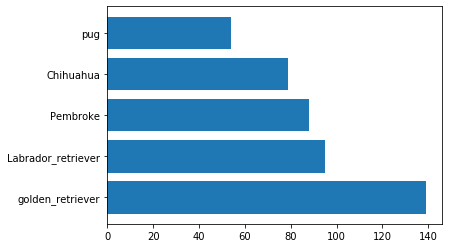

In [697]:
fig = df_master['p1'].value_counts()[:5].plot.barh(width=0.8).get_figure().savefig('visualization.png', dpi=300)

The most common dog breed featured, according to the dog prediction data provided, is `golden_retriever`, with a value of approximately `139`.